## Mathematical Analysis of the 3-qubit Toffoli gate with 4 CNOT gates

In this notebook we provide mathematical analysis of the the 3-qubit Toffoli gate with 4 CNOT gates and confirm the Toffoli gate truth table.

- First, info about S and T gates

__The S gate__, also known as the phase gate, is a single-qubit quantum gate that applies a phase shift of $$\pi/2$$ radians to the qubit's state. Its matrix representation is:

$$S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix} $$

When applied to a qubit, the S gate rotates the qubit's state around the Z-axis of the Bloch sphere by $$\pi/2$$ radians. This gate is also referred to as the square root of the Pauli-Z gate because applying the S gate twice is equivalent to applying the Pauli-Z gate.

__The T gate__, also known as the π/8 gate, is a single-qubit quantum gate that applies a phase shift of $$\pi/4$$ radians to the qubit's state. Its matrix representation is:

$$T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix} $$

When applied to a qubit, the T gate rotates the qubit's state around the Z-axis of the Bloch sphere by $$\pi/4$$ radians. It is related to the S gate, as applying the T gate twice is equivalent to applying the S gate.

__References__:

[1] https://www.mathworks.com/help/matlab/ref/sgate.html 

[2] https://www.mathworks.com/help/matlab/ref/tgate.html 

[3] https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.SGate

[4] https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.TGate

Let's see now how this quantum circuit that implements the 3-qubit Toffoli gate with 4 CNOT gates operates.
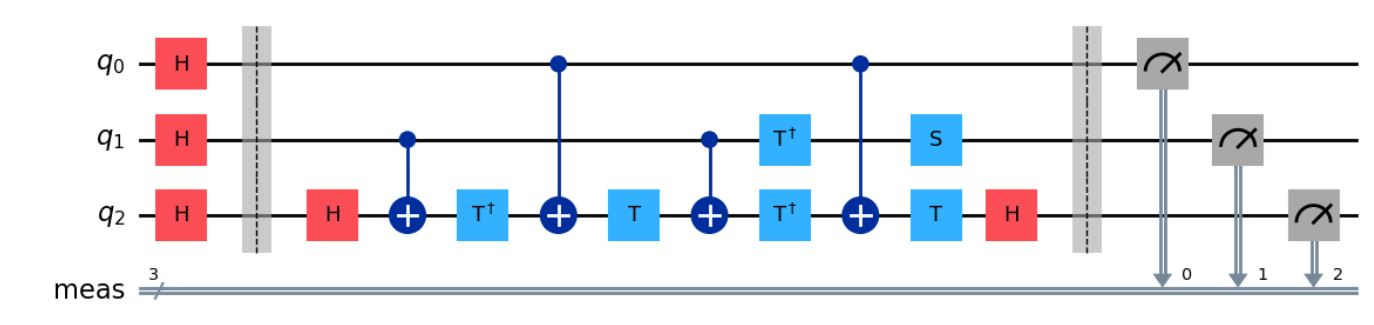

# Mathematical Analysis

- __Before the first barrier__

It is useful to recall how the Hadammard gate acts on |0> and |1> qubit states:
$$H|0> = {1/\sqrt{2}}(|0> + |1>)$$
$$H|1> = {1/\sqrt{2}}(|0> - |1>).$$
This can be compactly written as 
$$H|x> = {1/\sqrt{2}}(|0> + (-1)^x|1>)$$
where x is 0 or 1. 

All 3 qubits, $$q_0,q_1,q_2$$ 
are initially in the state |0> and on each of them is applied a Haddamard transformation H. 

This is to create all possible 3-qubit inputs.

The initial state of the 3-qubit system is $${\Psi}_{INIT}=|q_2q_1q_0>=|000>.$$
Thus, after Hadamard gates act on the qubits, we have
$$H^{\otimes 3}|000>=(H|0>)(H|0>)(H|0>)={1/\sqrt{2}}(|0> + |1>){1/\sqrt{2}}(|0> + |1>){1/\sqrt{2}}(|0> + |1>)$$
so the new 3-qubit quantum state is
$${\Psi}_1={1/\sqrt{2}}(|0> + |1>){1/\sqrt{2}}(|0> + |1>){1/\sqrt{2}}(|0> + |1>)=({1/\sqrt{2}})^3(|000>+|100>+|010>+|001>+|110>+|101>+|011>+|111>).$$
This entangled state represents all possible 3-qubit inputs.

__Let us dive into gates between 2 barriers__

Let's take any of the 3-qubit states in 
$${\Psi}_1=({1/\sqrt{2}})^3(|000>+|100>+|010>+|001>+|110>+|101>+|011>+|111>)$$
as an input state to the Toffoli gate (the gates between 2 barriers).
Suppose we call that state
$$|xyz>$$
where x,y,z is either 0 or 1.
We list now the corresponding output 3-qubit state for each gate in the Toffoli gate when it acts on the previous state.

- __The first H__

This H acts only on the $$q_2$$ so we get
$$(H \otimes 1_2 \otimes 1_2)|xyz>={1/\sqrt{2}}(|0> + (-1)^x|1>)|yz>$$
and the 3-qubit state after the first H is
$${\Psi}_{1H}={1/\sqrt{2}}(|0yz> + (-1)^x|1yz>).$$

- __The first CNOT__

The first CNOT acts between $$q_1, q_2$$ qubits. $$q_1$$ is the control qubit while $$q_2$$ is the target qubit.
A CNOT gate flips the target qubit state when the control qubit is in the state $$|1>.$$
For example,
$$CNOT|01>=|11>$$
$$CNOT|11>=|01>$$
$$CNOT|00>=|00>$$
$$CNOT|10>=|10>$$

which can be compactly written as
$$CNOT|\alpha\beta>=|{\alpha \oplus \beta}, \beta>$$
where $$\alpha \oplus \beta$$
is addition  modulo 2, which means
$$1 \oplus 1 = 0$$
$$1 \oplus 0 = 0 \oplus 1 = 1$$
$$0 \oplus 0 = 0.$$
Using this knowledge, we obtain for the 3-qubit state after the first CNOT
$$\Psi_{1HC_{NOT}}={1/\sqrt{2}}(|0yz> + (-1)^x|1yz>)={1/\sqrt{2}}(|0 \oplus y,yz> + (-1)^x|1 \oplus y,yz>)={1/\sqrt{2}}(|yyz> + (-1)^x|1 \oplus y,yz>).$$

- __The first T dagger gate__

The T dagger gate is $$T^{+} = \begin{pmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{pmatrix} $$
This gate leaves $$|0>$$ state unchanged, but the $$|1>$$ state gets $$e^{-i\pi/4}$$ phase factor. 
$$T^{+}|0>=|0>$$
$$T^{+}|1>=e^{-i\pi/4}|1>.$$
This can be written as
$$T^{+}|\alpha>=e^{({-i\pi/4})\times \alpha}|\alpha>.$$
T dagger gate acts on $$q_2$$ qubit.
Thus, for the 3-qubit state after the first T dagger state, we get
$$\Psi_{1HC_{NOT}T^{+}}=T^{+}{1/\sqrt{2}}(|yyz> + (-1)^x|1 \oplus y,yz>)={1/\sqrt{2}}(e^{({-i\pi/4})\times y}|yyz>+e^{({-i\pi/4})\times (1 \oplus y)}(-1)^x|1 \oplus y,yz>).$$

Going a little bit deeper, if the first qubit is in 0 state, meaning y=0 we have
$$\Psi_{1HC_{NOT}T^{+}}={1/\sqrt{2}}(e^{({-i\pi/4})\times 0}|00z>+(e^{({-i\pi/4})\times (1 \oplus 0)}(-1)^x|1 \oplus 0,0z>)={1/\sqrt{2}}(|00z>+e^{-i\pi/4}(-1)^x|10z>).$$
If the first qubit is in 1 state, meaning y=1 we have
$$\Psi_{1HC_{NOT}T^{+}}={1/\sqrt{2}}(e^{({-i\pi/4})\times 1}|11z>+(e^{({-i\pi/4})\times (1 \oplus 1)}(-1)^x|1 \oplus 1,1z>)={1/\sqrt{2}}(e^{-i\pi/4}|11z>+(-1)^x|01z>).$$
From now on, we are going to follow these 2 possibilities explicitly.

- __The second CNOT__

The second CNOT acts between the 0th and the second qubit, so the 3-qubit state becomes

$$\Psi_{1HC_{NOT}T^{+}C_{NOT}}=CNOT{1/\sqrt{2}}(|00z>+e^{-i\pi/4}(-1)^x|10z>)={1/\sqrt{2}}(|0 \oplus z,0z>+e^{-i\pi/4}(-1)^x|1 \oplus z,0z>)={1/\sqrt{2}}(|z0z>+e^{-i\pi/4}(-1)^x|1 \oplus z,0z>)$$
or
$$\Psi_{1HC_{NOT}T^{+}C_{NOT}}=CNOT{1/\sqrt{2}}(e^{-i\pi/4}|11z>+(-1)^x|01z>)={1/\sqrt{2}}(e^{-i\pi/4}|1 \oplus z,1z>+(-1)^x|0 \oplus z,1z>)={1/\sqrt{2}}(e^{-i\pi/4}|1 \oplus z,1z>+(-1)^x|z1z>)$$
depending whether the first qubit is in 0 or 1 state.

Now we have 4 possibilites:
$$\begin{pmatrix} q_0=0 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}}={1/\sqrt{2}}(|000>+e^{-i\pi/4}(-1)^x|100>)\\ q_0=0 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}}={1/\sqrt{2}}(e^{-i\pi/4}|110>+(-1)^x|010>)\\  q_0=1 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}}={1/\sqrt{2}}(|101>+e^{-i\pi/4}(-1)^x|001>)\\ q_0=1 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}}={1/\sqrt{2}}(e^{-i\pi/4}|011>+(-1)^x|111>)\end{pmatrix} $$

- __The first T gate__

T gate acts on $$q_2.$$
Using $$T|\alpha>=e^{({i\pi/4})\times \alpha}|\alpha>$$
we obtain
$$\begin{pmatrix} q_0=0 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}T}={1/\sqrt{2}}(|000>+(-1)^x|100>)\\ q_0=0 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}T}={1/\sqrt{2}}(|110>+(-1)^x|010>)\\  q_0=1 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}T}={1/\sqrt{2}}(e^{i\pi/4}|101>+e^{-i\pi/4}(-1)^x|001>)\\ q_0=1 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}T}={1/\sqrt{2}}(e^{-i\pi/4}|011>+e^{i\pi/4}(-1)^x|111>)\end{pmatrix} $$


- __The third CNOT__

The second CNOT acts between the first and the second qubit, so we get
$$\begin{pmatrix} q_0=0 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}}={1/\sqrt{2}}(|000>+(-1)^x|100>)\\ q_0=0 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}}={1/\sqrt{2}}(|010>+(-1)^x|110>)\\  q_0=1 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}}={1/\sqrt{2}}(e^{i\pi/4}|101>+e^{-i\pi/4}(-1)^x|001>)\\ q_0=1 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}}={1/\sqrt{2}}(e^{-i\pi/4}|111>+e^{i\pi/4}(-1)^x|011>)\end{pmatrix} $$

- __The second and third dagger gates__

These gates act on the first and second qubits, yielding
$$\begin{pmatrix} q_0=0 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}}={1/\sqrt{2}}(|000>+e^{-i\pi/4}(-1)^x|100>)\\ q_0=0 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}}={1/\sqrt{2}}(e^{-i\pi/4}|010>+e^{-i\pi/2}(-1)^x|110>)\\  q_0=1 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}}={1/\sqrt{2}}(|101>+e^{-i\pi/4}(-1)^x|001>)\\ q_0=1 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}}={1/\sqrt{2}}(e^{-i3\pi/4}|111>+(-1)^x|011>)\end{pmatrix} $$

- __The fourth CNOT__

Since the fourth CNOT acts between the 0th and the second qubit, we get
$$\begin{pmatrix} q_0=0 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}}={1/\sqrt{2}}(|000>+e^{-i\pi/4}(-1)^x|100>)\\ q_0=0 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}}={1/\sqrt{2}}(e^{-i\pi/4}|010>+e^{-i\pi/2}(-1)^x|110>)\\  q_0=1 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}}={1/\sqrt{2}}(|001>+e^{-i\pi/4}(-1)^x|101>)\\ q_0=1 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}}={1/\sqrt{2}}(e^{-i3\pi/4}|011>+(-1)^x|111>)\end{pmatrix} $$

- __S and T gates__

Similar to the T gate, we have for the S gate
$$S|\alpha>=e^{({i\pi/2})\times \alpha}|\alpha>.$$
S gates acts on the first qubit and T gates acts on the second qubit so we have
$$\begin{pmatrix} q_0=0 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}ST}={1/\sqrt{2}}(|000>+(-1)^x|100>)\\ q_0=0 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}ST}={1/\sqrt{2}}(e^{i\pi/4}|010>+e^{i\pi/4}(-1)^x|110>)\\  q_0=1 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}ST}={1/\sqrt{2}}(|001>+(-1)^x|101>)\\ q_0=1 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}ST}={1/\sqrt{2}}(e^{-i\pi/4}|011>+e^{i3\pi/4}(-1)^x|111>)\end{pmatrix} $$

- __The final H gate__

For the first case
$$q_0=0, q_1=0$$
when H gate acts we get
$$\Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}STH}={1/\sqrt{2}}[{1/\sqrt{2}}(|0>+|1>)|00>+(-1)^x{1/\sqrt{2}}(|0>-|1>)|00>]={1/2}[(1+(-1)^x)|000>+(1-(-1)^x)|100>].$$
We do same calculation for other cases and obtain
$$\begin{pmatrix} q_0=0 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}STH}={1/2}[(1+(-1)^x)|000>+(1-(-1)^x)|100>]\\ q_0=0 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}STH}={e^{i\pi/4}/2}[(1+(-1)^x)|010>+(1-(-1)^x)|110>]\\  q_0=1 & q_1=0 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}STH}={1/2}[(1+(-1)^x)|001>+(1-(-1)^x)|101>]\\ q_0=1 & q_1=1 & \Psi_{1HC_{NOT}T^{+}C_{NOT}TC_{NOT}T^{+}T^{+}C_{NOT}STH}={e^{i3\pi/4}/2}[(-1+(-1)^x)|011>-(1+(-1)^x)|111>]\end{pmatrix} $$


- __The final state__

We are finally in a position to reveal for every of the 3-qubit states in $${\Psi}_1=({1/\sqrt{2}})^3(|000>+|100>+|010>+|001>+|110>+|101>+|011>+|111>)$$ respective output state when the Toffoli gate acts on it.
Remember, x marks $$q_2$$ qubit.
$$q_0=0,q_1=0,q_2=0 => {1/2}[(1+(-1)^x)|000>+(1-(-1)^x)|100>]=|000>$$
$$q_0=0,q_1=0,q_2=1 => {1/2}[(1+(-1)^x)|000>+(1-(-1)^x)|100>]=|100>$$
$$q_0=0,q_1=1,q_2=0 => {e^{i\pi/4}/2}[(1+(-1)^x)|010>+(1-(-1)^x)|110>]=e^{i\pi/4}|010>$$
$$q_0=0,q_1=1,q_2=1 => {e^{i\pi/4}/2}[(1+(-1)^x)|010>+(1-(-1)^x)|110>]=e^{i\pi/4}|110>$$
$$q_0=1,q_1=0,q_2=0 => {1/2}[(1+(-1)^x)|001>+(1-(-1)^x)|101>]=|001>$$
$$q_0=1,q_1=0,q_2=1 => {1/2}[(1+(-1)^x)|001>+(1-(-1)^x)|101>]=|101>$$
$$q_0=1,q_1=1,q_2=0 => {e^{i3\pi/4}/2}[(-1+(-1)^x)|011>-(1+(-1)^x)|111>]=-e^{i3\pi/4}|111>$$
$$q_0=1,q_1=1,q_2=1 => {e^{i3\pi/4}/2}[(-1+(-1)^x)|011>-(1+(-1)^x)|111>]=-e^{i3\pi/4}|011>$$

__The above cell confirms that the above 3-qubit circut with 4 CNOT gates does satsify the Toffoli gate truth table and is indeed the Toffoli gate.__
$$\begin{pmatrix} INPUT-STATE & OUTPUT-STATE \\ |000> & |000> \\ |100> & |100> \\ |010> & e^{i\pi/4}|010> \\ |001> & |001> \\ |110> & e^{i\pi/4}|110> \\ |101> & |101> \\ |011> & -e^{i3\pi/4}|111> \\ |111> & -e^{i3\pi/4}|011>\end{pmatrix} $$
Qubits $$q_0, q_1$$ are control qubits while $$q_2$$ is the target qubit.

The final output state of the 3-qubits is
$${\Psi}_{OUT}=({1/\sqrt{2}})^3(|000>+|100>+e^{i\pi/4}|010>+|001>+e^{i\pi/4}|110>+|101>-e^{i3\pi/4}|011>-e^{i3\pi/4}|111>)$$ 